## Import the `fastai` library

import all items from fastai.vision.all

In [1]:
from fastai.vision.all import *

/Users/congho/su-homework/data-5100-foundations-of-data-science/classification/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


import all items from fastcore.all

In [2]:
from fastcore.all import *

## Data for dogs vs cars classifier

Download and get the path to the image

In [3]:
path = untar_data(URLs.PETS)

Get the file names for each image

In [4]:
file_names = get_image_files(path/'images')

In [5]:
f'We have {len(file_names)} images.'

'We have 7390 images.'

Look at a few images

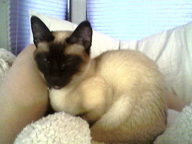

In [6]:
img = PILImage.create(file_names[15])

img.to_thumb(192)

## Data processing

Examine the image file name

In [7]:
file_names[:5]

(#5) [Path('/Users/congho/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/congho/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/congho/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/congho/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/congho/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

The dataset was originally collected to work on a problem of identifying the breed of the animal, not just whether a dog or a cat. So we have multiple type of cats and dogs. We can notice that there is a convention that they used in naming these files where dogs have a lower case first letter in the name and the cats have a upper case first letter in the name. So we can define a function that produce the label "cat" or "dog" according to this convention.

In [8]:
def label_function(file_name):
  return "cat" if file_name.name[0].isupper() else "dog"

## Process the images

Load the image data uses to train and test the network. First create a `DataBlock` that describe how the data should be loaded, transformed, and what type of task it will be used for.

In [9]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_function,
    splitter=RandomSplitter(seed=1),
    item_tfms=Resize(224)
)

Load the data

In [10]:
dls = dblock.dataloaders(path/"images")

So this data block, we can specify transformations that we might want to apply to the images. We are resizing the image so that they have a image size 224 by 224 pixel, and then we can load the data. We can use `show_batch()` method to show a few images and their labels

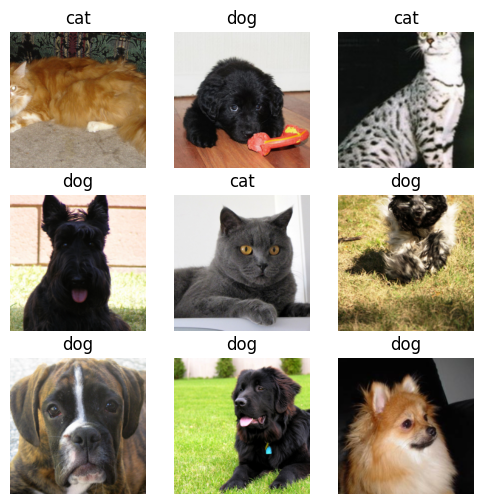

In [11]:
dls.show_batch(figsize=(6,6))

In this case, it's randomly selected a number of images which have cat and dog. We will use transfer learning to train the network to classify image as dogs and cats. We will train a model using resnet34 that has already been trained to solve an image classification problem involving many types of images

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/congho/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:07<00:00, 11.5MB/s]


In [13]:
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.146641,0.019067,0.006766,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.063803,0.007276,0.001353,00:38


## Assess model performance

Using `ClassificationInterpretation` function to help analyze the performance of the model.

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

Plot the confusion matrix, which shows the number of images in the validation set that were correctly and incorrectly classified by the model.

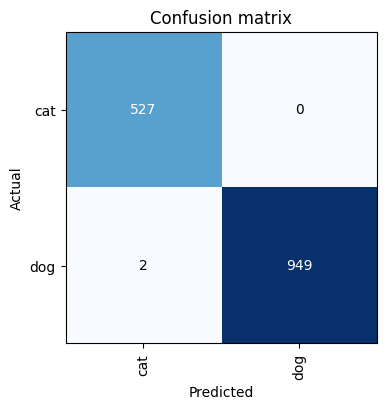

In [15]:
interp.plot_confusion_matrix(figsize=(4,4))

So 1470 images were correctly predicted as cats or dogs, while there were only 8 images where we had errors. We can look at the top loss images.

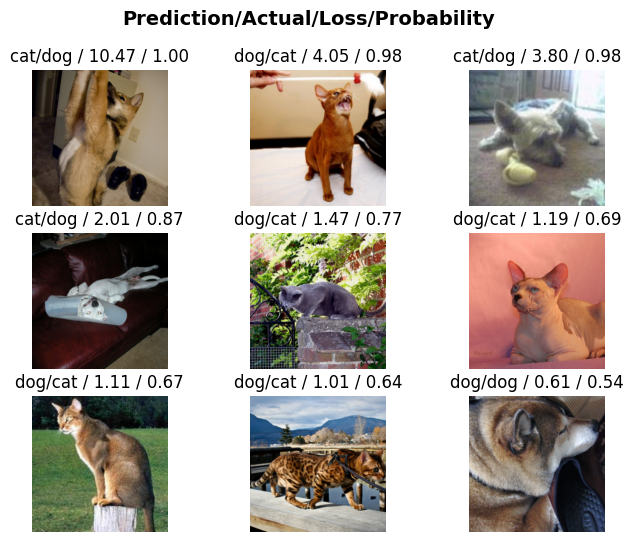

In [ ]:
interp.plot_top_losses(9, nrows=3, figsize=(8,6))

This show us that with a relative small data set and a short training time, we can train this deep neural network to very accurately solve this highly complicated image classification problem.

## Deployment

predicted animal: dog
Probability it is this animal is a dog: 0.9999998807907104


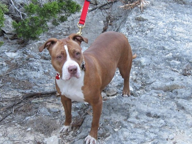

In [ ]:
img = PILImage.create(file_names[500])
prediction, _, probs= learn.predict(img)
print(f"predicted animal: {prediction}")
print(f"Probability it is this animal is a dog: {probs[1].item():}")
img.to_thumb(192)

load a new dog image to test the model

view the image

In [ ]:
!wget -O Lu.png https://i.postimg.cc/T1bp7KH2/IMG-3228.jpg

--2025-10-24 06:15:18--  https://i.postimg.cc/T1bp7KH2/IMG-3228.jpg
Resolving i.postimg.cc (i.postimg.cc)... 46.105.222.81, 46.105.222.82, 46.105.222.161, ...
Connecting to i.postimg.cc (i.postimg.cc)|46.105.222.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81382 (79K) [image/jpeg]
Saving to: ‘Lu.png’

Lu.png              100%[===================>]  79.47K  --.-KB/s    in 0.03s   

2025-10-24 06:15:18 (2.50 MB/s) - ‘Lu.png’ saved [81382/81382]



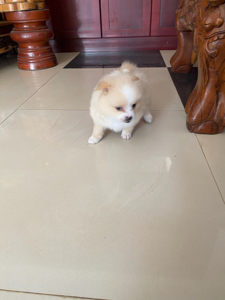

In [ ]:
img = PILImage.create('Lu.png')
img.to_thumb(300)

Predict the image class and plot the prediction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

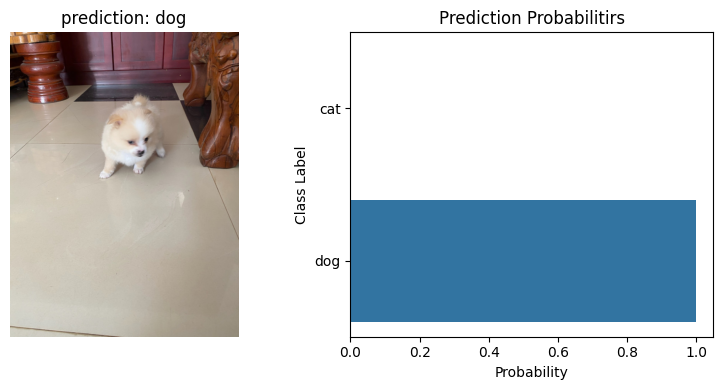

In [ ]:
prediction, _, probs = learn.predict(img)

fig, axes = plt.subplots(1, 2, figsize = (8,4))

axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title(f'prediction: {prediction}')

sns.barplot(x=probs, y=dls.vocab, orient='h', ax=axes[1])
axes[1].set_xlabel("Probability")
axes[1].set_ylabel("Class Label")
axes[1].set_title("Prediction Probabilitirs")

plt.tight_layout()
plt.show()